In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 0. General note

* This notebook produces figures and calculations presented in [Ye et al. 2017, JGR](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2016JB013811).

* This notebook shows the pressure-temperature conditions of the datasets presented in the paper.  There are two different kinds of datasets: (1) Pt-MgO and (2) Au-MgO.  Gold and platinum were never mixed directly together to prevent any possible alloying at high pressure and high temperature.

# 1. Global setup

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from uncertainties import unumpy as unp
import pytheos as eos

# 2. Data Input

Notations for datasets.

* PM = Pt-MgO
* AM = Au-MgO

## 2.1. Reading Pt-MgO (PM) and Au-MgO (AM) at High T and 300 K

In [9]:
data_PM = pd.read_csv('./data/Pt_MgO_HiT.csv')
data_AM = pd.read_csv('./data/Au_MgO_HiT.csv')
data_PMN_300 = pd.read_csv('./data/Pt_MgO_Ne_300K.csv')
data_AMN_300 = pd.read_csv('./data/Au_MgO_Ne_300K.csv')

In [10]:
v_Pt_PM    = data_PM['V(Pt)'] 
s_v_Pt_PM  = data_PM['sV(Pt)']
v_MgO_PM   = data_PM['V(MgO)'] 
s_v_MgO_PM = data_PM['sV(MgO)']
T_PM    = data_PM['T'] 
s_T_PM  = data_PM['sT']

v_Au_AM    = data_AM['V(Au)'] 
s_v_Au_AM  = data_AM['sV(Au)']
v_MgO_AM   = data_AM['V(MgO)'] 
s_v_MgO_AM = data_AM['sV(MgO)']
T_AM    = data_AM['T'] 
s_T_AM  = data_AM['sT']

v_Pt_PMN    = data_PMN_300['V(Pt)'] 
s_v_Pt_PMN  = data_PMN_300['sV(Pt)']
v_MgO_PMN   = data_PMN_300['V(MgO)'] 
s_v_MgO_PMN = data_PMN_300['sV(MgO)']
T_PMN       = 300. * np.ones_like(v_Pt_PMN)

v_Au_AMN    = data_AMN_300['V(Au)'] 
s_v_Au_AMN  = data_AMN_300['sV(Au)']
v_MgO_AMN   = data_AMN_300['V(MgO)'] 
s_v_MgO_AMN = data_AMN_300['sV(MgO)']
T_AMN       = 300. * np.ones_like(v_Au_AMN)

## 2.2. Define Pt, Au, and MgO scales

In [11]:
std_MgO = eos.periclase.Dorogokupets2007()
std_Au  = eos.gold.Dorogokupets2007()
std_Pt  = eos.platinum.Dorogokupets2007()

# 3. Calculating pressure

In [12]:
p_MgO_PM = std_MgO.cal_p(unp.uarray(v_MgO_PM, s_v_MgO_PM), unp.uarray(T_PM, s_T_PM))
p_MgO_AM = std_MgO.cal_p(unp.uarray(v_MgO_AM, s_v_MgO_AM), unp.uarray(T_AM, s_T_AM))
p_Pt_PM = std_Pt.cal_p(unp.uarray(v_Pt_PM, s_v_Pt_PM), unp.uarray(T_PM, s_T_PM))
p_Au_AM = std_Au.cal_p(unp.uarray(v_Au_AM, s_v_Au_AM), unp.uarray(T_AM, s_T_AM))

p_MgO_PMN = std_MgO.cal_p(unp.uarray(v_MgO_PMN,s_v_MgO_PMN), T_PMN)
p_MgO_AMN = std_MgO.cal_p(unp.uarray(v_MgO_AMN,s_v_MgO_AMN), T_AMN)
p_Pt_PMN = std_Pt.cal_p(unp.uarray(v_Pt_PMN,s_v_Pt_PMN), T_PMN)
p_Au_AMN = std_Au.cal_p(unp.uarray(v_Au_AMN,s_v_Au_AMN), T_AMN)

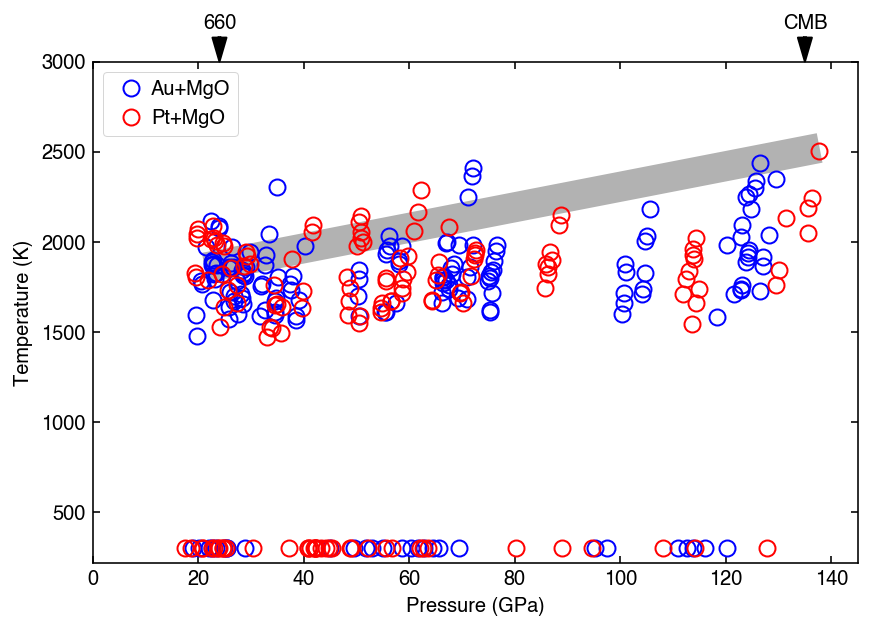

In [13]:
f, ax = plt.subplots(1, 1, \
                    figsize=(6,4))
ms = 8; mew = 1

ax.errorbar(unp.nominal_values(p_MgO_AM), T_AM, \
#            xerr = unp.std_devs(p_MgO_AM), yerr = s_T_AM, \
            fmt='o', mfc='None', mec='b', mew=mew, label = 'Au+MgO', \
            ms=ms, capsize=0, lw=0.4, ecolor='b')
ax.errorbar(unp.nominal_values(p_MgO_PM), T_PM, \
#            xerr = unp.std_devs(p_MgO_PM), yerr = s_T_PM, \
            fmt='o', mfc='None', mec='r', mew=mew, label="Pt+MgO", \
            ms=ms, capsize=0, lw=0.4, ecolor='r')
ax.errorbar(unp.nominal_values(p_MgO_AMN), T_AMN, \
#            xerr = unp.std_devs(p_MgO_AMN), \
            fmt='o', mfc='None', mec='b', mew=mew, \
            ms=ms, capsize=0, lw=0.4, ecolor='b')
ax.errorbar(unp.nominal_values(p_MgO_PMN), T_PMN, \
#            xerr = unp.std_devs(p_MgO_PMN), \
            fmt='o', mfc='None', mec='r', mew=mew, \
            ms=ms, capsize=0, lw=0.4, ecolor='r')
ax.plot([24.,135.], [1873., 2505.], 'k-', zorder=0, lw=15, alpha=0.3)
ax.set_xlabel('Pressure (GPa)'); ax.set_ylabel('Temperature (K)')
l = ax.legend(loc='upper left', numpoints = 1, fontsize = 10, \
             handletextpad=0)
l.get_frame().set_linewidth(0.5)
plt.tight_layout(pad=0.5)
ax.set_ylim(220,3000); ax.set_xlim(0.,145.)
ax.annotate('CMB', xy=(135, 3000), xytext=(135, 3180),
            arrowprops=dict(facecolor='black', \
                            width=1, headlength=12, headwidth=7),\
            horizontalalignment='center')
ax.annotate('660', xy=(24, 3000), xytext=(24, 3180),
            arrowprops=dict(facecolor='black', \
                            width=1, headlength=12, headwidth=7),\
            horizontalalignment='center')

plt.savefig('f-DataDist.pdf', bbox_inches='tight', \
                        pad_inches=0.4)